In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='CreditScore', ylabel='Count'>

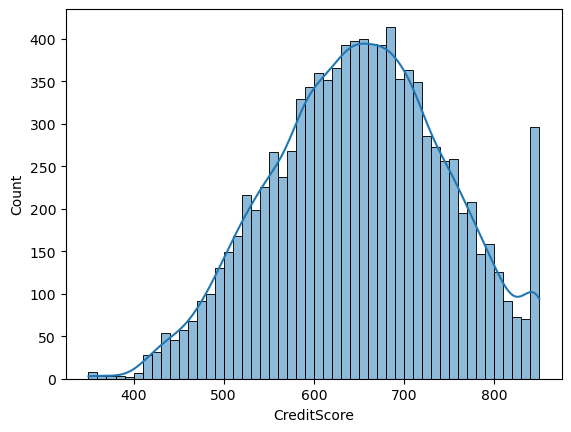

In [6]:
sns.histplot(df['CreditScore'],bins=50,kde=True)

<Axes: xlabel='Age', ylabel='Count'>

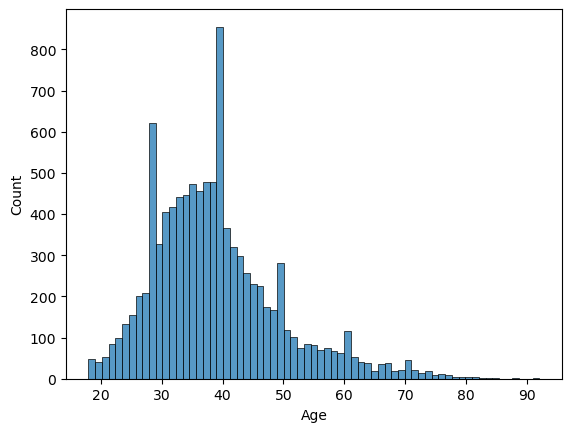

In [7]:
sns.histplot(df['Age'])

<Axes: xlabel='IsActiveMember', ylabel='count'>

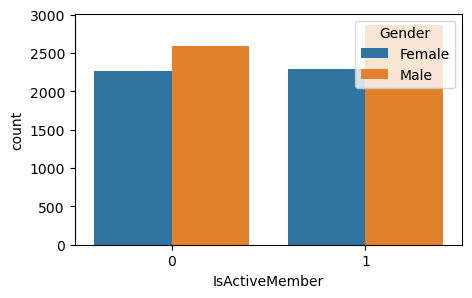

In [8]:
plt.figure(figsize=(5,3))
sns.countplot(x='IsActiveMember',data=df,hue='Gender')

<Axes: xlabel='Exited', ylabel='count'>

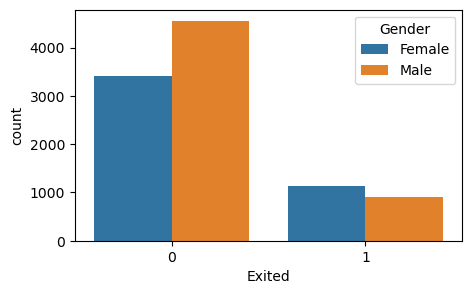

In [9]:
plt.figure(figsize=(5,3))
sns.countplot(x='Exited',data=df,hue='Gender')

<Axes: xlabel='Exited', ylabel='count'>

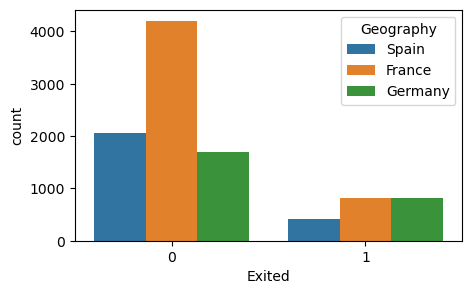

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(x='Exited',data=df,hue='Geography')

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#Encoding the labels
from sklearn.preprocessing import LabelEncoder

In [13]:
le_gender=LabelEncoder()
df['Gender']=le_gender.fit_transform(df['Gender'])

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
#Taget Encoding

In [16]:
#df['Geography_target'] = df.groupby('Geography')['Exited'].transform('mean')

In [17]:
rank=df.groupby('Geography').mean()['Exited'].sort_values()

In [18]:
rank

Geography
France     0.161548
Spain      0.166734
Germany    0.324432
Name: Exited, dtype: float64

In [19]:
for i in enumerate(rank.index,1):
    print(i)

(1, 'France')
(2, 'Spain')
(3, 'Germany')


In [20]:
ranking={geography:rank for rank,geography in enumerate(rank.index,1)}
ranking

{'France': 1, 'Spain': 2, 'Germany': 3}

In [21]:
df['Geography_Rank']=df['Geography'].map(ranking)
df.drop('Geography',axis=1,inplace=True)

In [22]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Rank
0,619,0,42,2,0.00,1,1,1,101348.88,1,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,2
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,1
4,850,0,43,2,125510.82,1,1,1,79084.10,0,2


In [23]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [25]:
#Scaling the features

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
#X_train

In [29]:
#Model Creation

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.optimizers import Adam

In [31]:
early_stop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [32]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),   
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    
    Dense(1, activation='sigmoid')      
])

In [33]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,validation_split=0.2,epochs=50,callbacks=[early_stop])

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6933 - loss: 0.6016 - val_accuracy: 0.7962 - val_loss: 0.4678
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.4739 - val_accuracy: 0.8106 - val_loss: 0.4185
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.4175 - val_accuracy: 0.8500 - val_loss: 0.3688
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8167 - loss: 0.4286 - val_accuracy: 0.8600 - val_loss: 0.3490
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8315 - loss: 0.4025 - val_accuracy: 0.8575 - val_loss: 0.3505
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.3840 - val_accuracy: 0.8619 - val_loss: 0.3463
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8369 - loss: 0.3859 - val_accuracy: 0.8694 - val_loss: 0.3375
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8409 - loss: 0.3855 - val_accuracy: 0.

In [34]:
#Model Evaluation

In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.3371
Test Accuracy: 0.8535


In [83]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Axes(0.125,0.11;0.62x0.77)


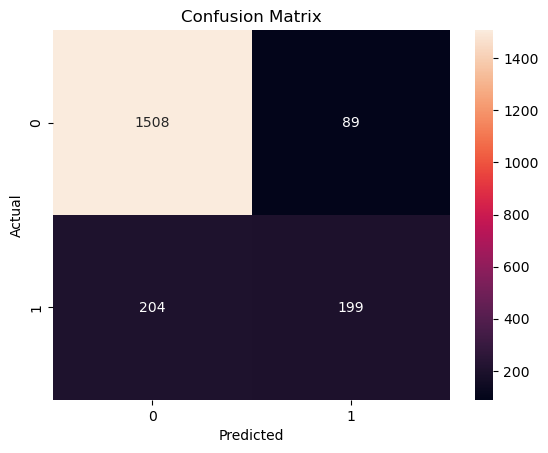

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
plt.title('Confusion Matrix')
print(sns.heatmap(confusion_matrix(y_test, y_pred),fmt='d',annot=True))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [87]:
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1597
           1       0.69      0.49      0.58       403

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



ROC-AUC Score: 0.8638


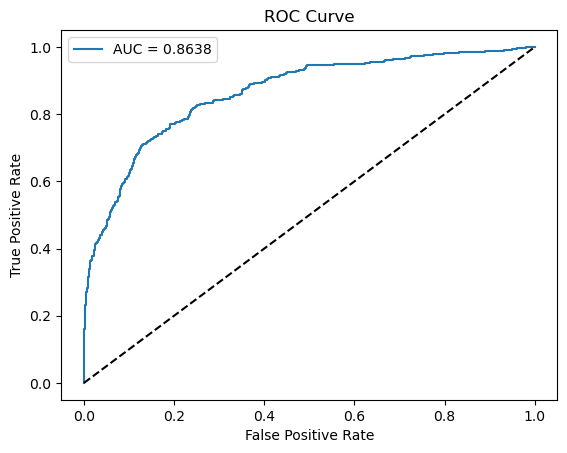

In [89]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [99]:
y_test.value_counts()

Exited
0    1597
1     403
Name: count, dtype: int64